In [29]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Opening JSON file
f = open('all_preds.json')
 
# returns JSON object as 
# a dictionary
data = json.load(f)

In [3]:
dt = []

In [4]:
for news in data.keys():
    if data[news]['popularity'] > 0:
        dt.append([news, data[news]['probability'][0],data[news]['popularity'] ])

In [5]:
f.close()

In [6]:
df = pd.DataFrame(dt, columns=['news_id', 'click_probability', 'click_counts'])

In [7]:
df

,news_id,click_probability,click_counts
0,N95341,-0.363141,8584
1,N24017,-0.225803,3295
2,N62800,-0.506392,3430
3,N32433,-0.082309,23
4,N68346,-0.266367,3471
...,...,...,...
389,N62613,-0.410109,1686
390,N8144,-0.122621,3142
391,N54671,0.323327,2
392,N9935,-0.121726,5634


In [ ]:
df.sort_values(by='click_probability')

In [8]:
df.corr()

C:\Users\markt\AppData\Local\Temp\ipykernel_142412\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,click_probability,click_counts
click_probability,1.00000,0.23376
click_counts,0.23376,1.00000


<AxesSubplot: xlabel='click_counts', ylabel='click_probability'>

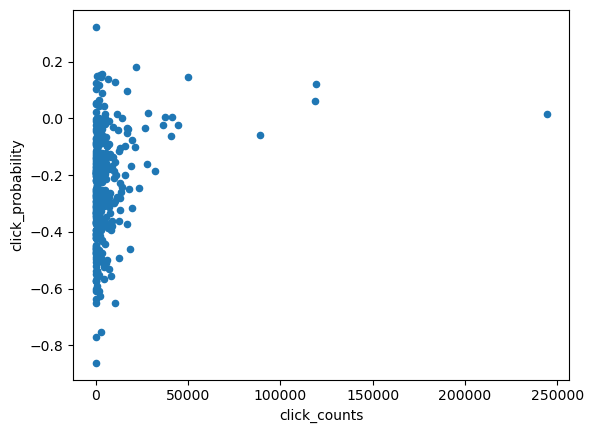

In [17]:
df.sort_values(by='click_counts').plot.scatter('click_counts', 'click_probability')

In [18]:
f = open('all_preds_bert.json')
 
# returns JSON object as 
# a dictionary
data = json.load(f)
dt = []
for news in data.keys():
    if data[news]['popularity'] > 0:
        dt.append([news, data[news]['probability'][0],data[news]['popularity'] ])
f.close()
df2 = pd.DataFrame(dt, columns=['news_id', 'click_probability', 'click_counts'])

In [33]:
df2.corr()

C:\Users\markt\AppData\Local\Temp\ipykernel_142412\1778878097.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2.corr()


,click_probability,click_counts
click_probability,1.000000,0.177776
click_counts,0.177776,1.000000


In [25]:
df3 = pd.merge(df, df2, on=['news_id', 'click_counts'], suffixes=('_base','_bert'))

In [27]:
df3

,news_id,click_probability_base,click_counts,click_probability_bert
0,N95341,-0.363141,8584,-0.306589
1,N24017,-0.225803,3295,0.000084
2,N62800,-0.506392,3430,-0.113747
3,N32433,-0.082309,23,-0.252355
4,N68346,-0.266367,3471,-0.156499
...,...,...,...,...
389,N62613,-0.410109,1686,-0.191254
390,N8144,-0.122621,3142,-0.121015
391,N54671,0.323327,2,0.360222
392,N9935,-0.121726,5634,0.097893


In [30]:
df3.sort_values(by='click_counts', inplace=True)

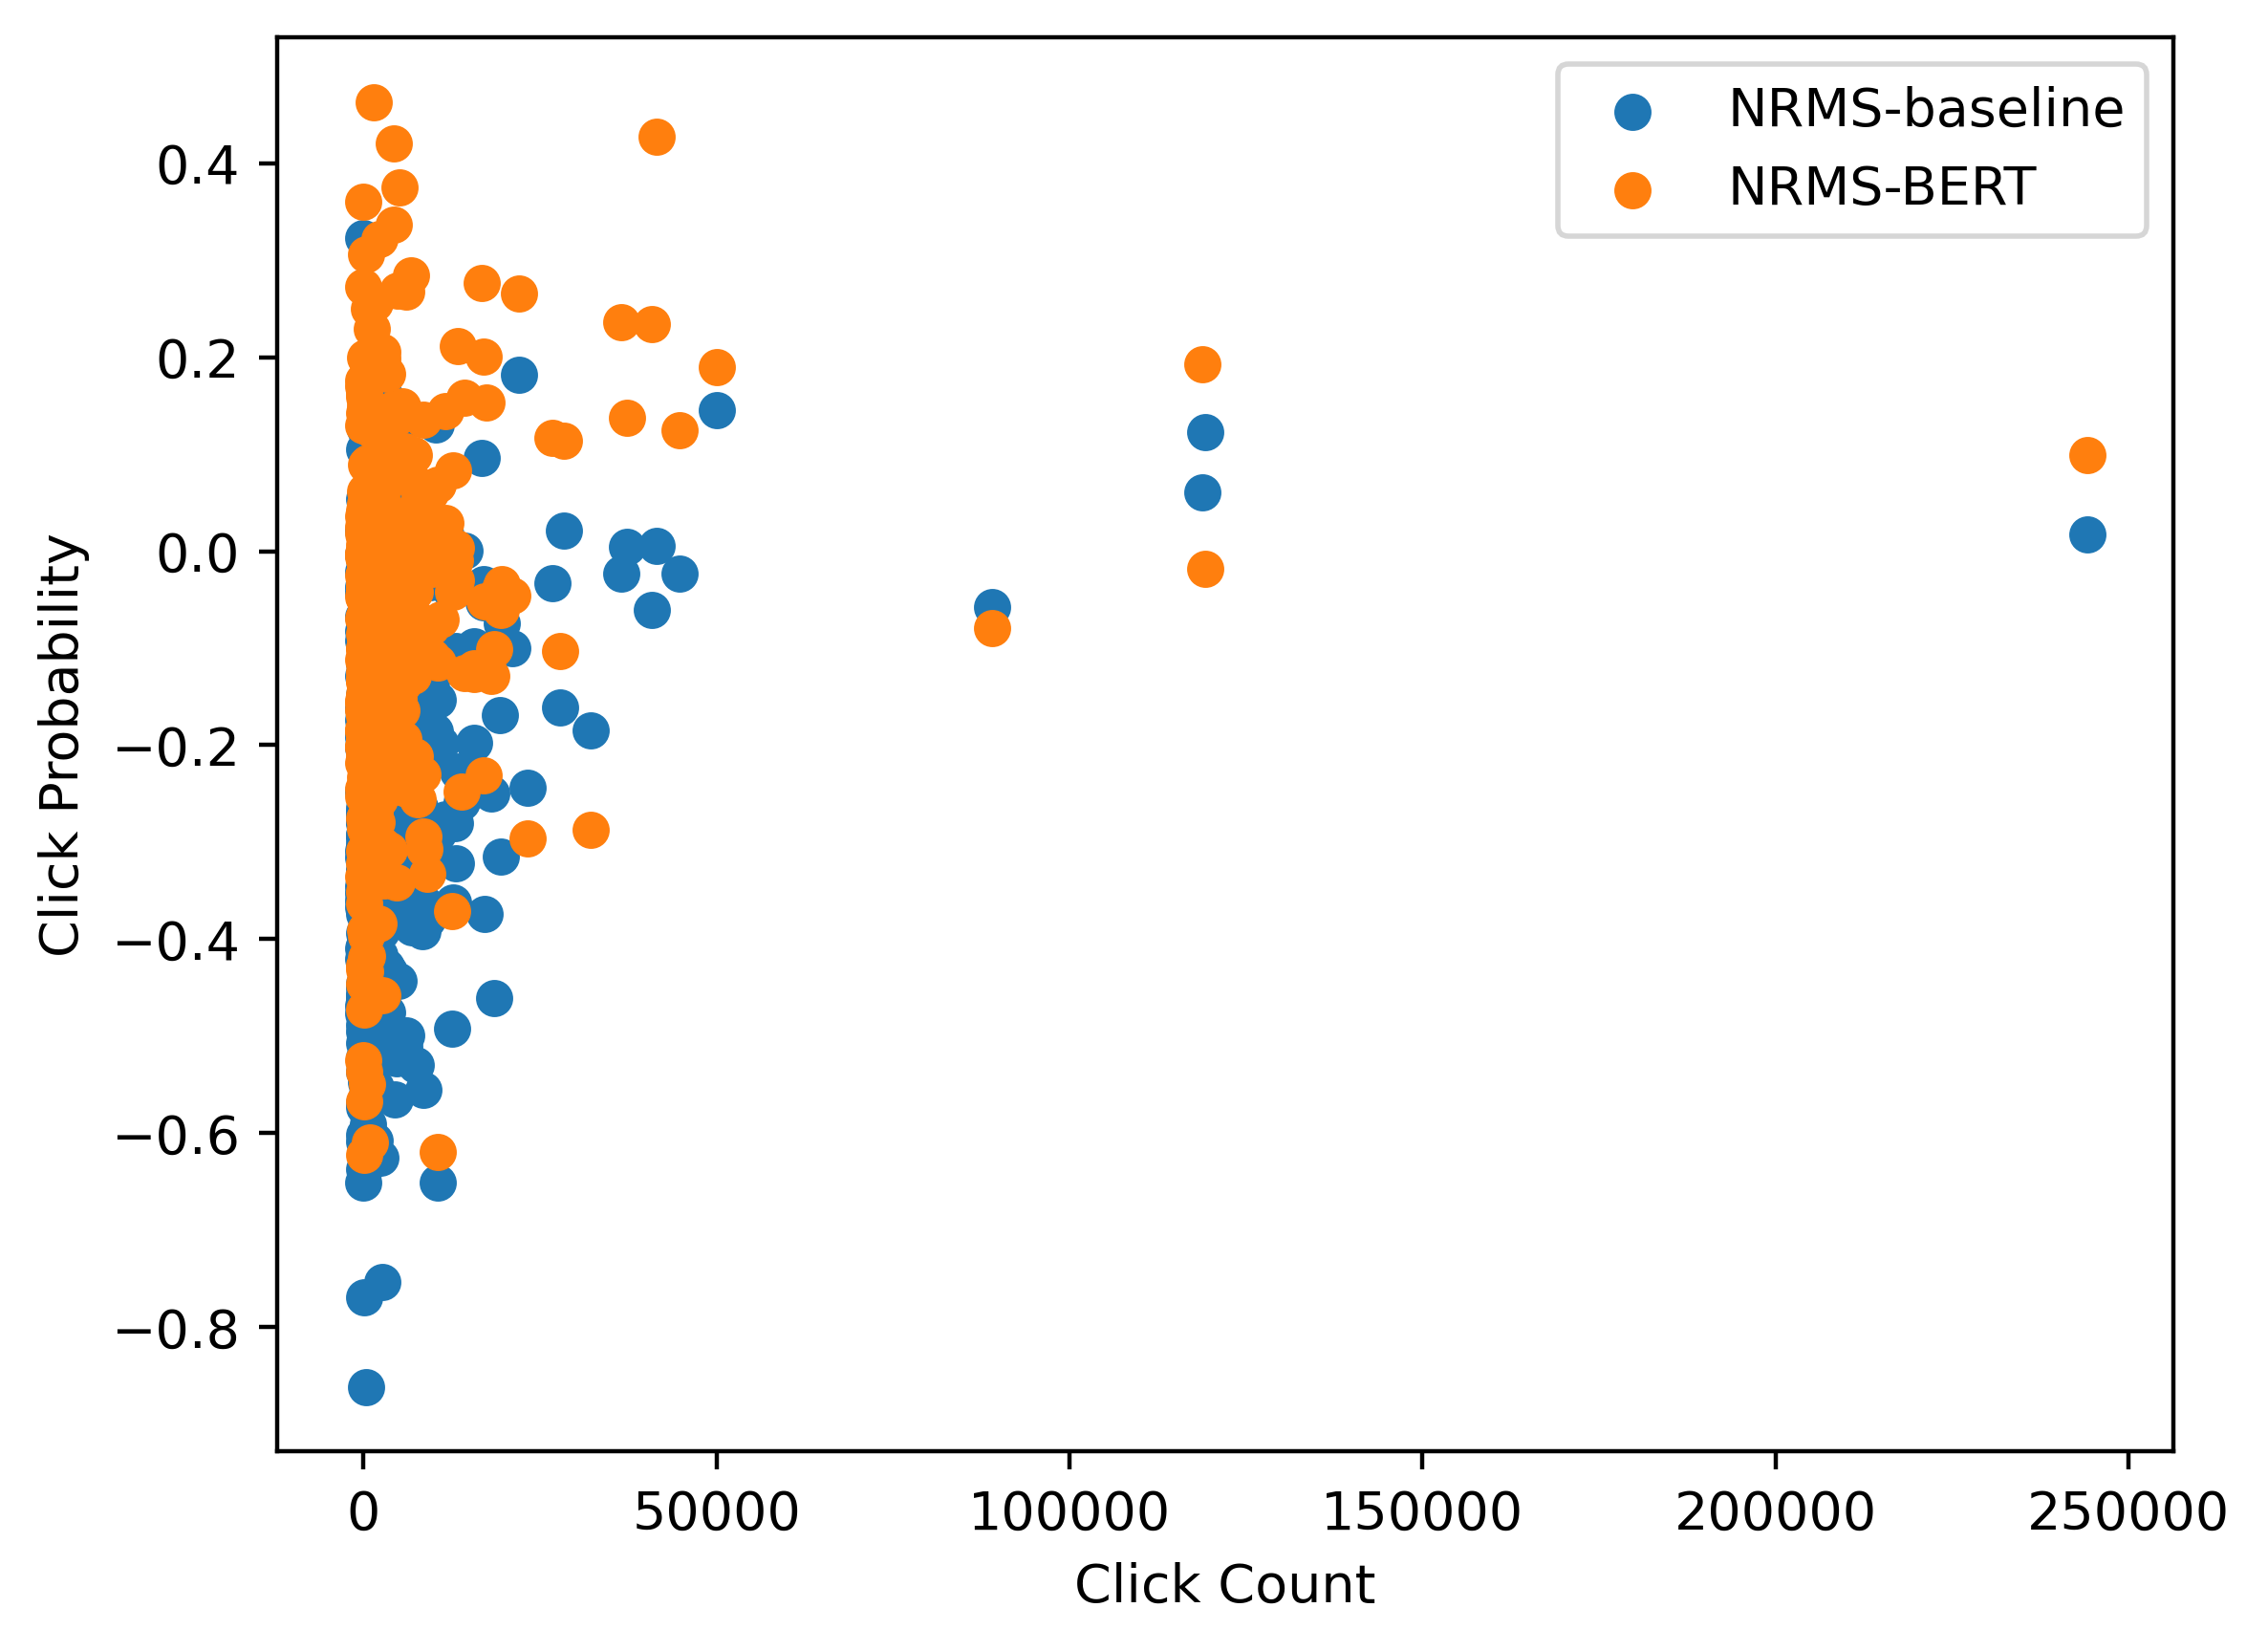

In [36]:
plt.figure(dpi=400)
plt.scatter(df3['click_counts'], df3['click_probability_base'])
plt.scatter(df3['click_counts'], df3['click_probability_bert'])
plt.legend(["NRMS-baseline", "NRMS-BERT"])
plt.xlabel("Click Count")
plt.ylabel("Click Probability")
plt.show()